Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Caleb Andree"
COLLABORATORS = ""

---

# LAB 3: Aggregation and Plotting [Total: 7 points]

The purpose of this assignment is for you to engage with a concrete data aggregation and visualization task. This will be accomplished through a coding assignment. You will carry out this task in the present notebook, and use the notebook to document the various steps of the exercise and to answer all questions.

We have prepared a data that combines weather and trips data, which is available in the file `WeatherTrips.csv`. All questions use various part


## Table of Contents
<ul>
    <li><a href="#Submission-checklist">Submission checklist</a></li>
    <li><a href="#Q1">Question 1</a></li>
    <li><a href="#Q2">Question 2</a></li>
    <li><a href="#Q3">Question 3</a></li>
    <li><a href="#Q4">Question 4</a></li>
    <li><a href="#Q5">Question 5</a></li>
    <li><a href="#Q6">Question 6</a></li>
</ul>

## Submission checklist

**Points**: 1

Before submitting make sure that:

1. Your name is included above, plus the name of any collaborator you worked with;
2. All Markdown cells you edited are rendering correctly, especially the ones with answers.
3. You have removed any `raise NotImplementedError()` line from your code cells.

In [2]:
import pandas as pd
df = pd.read_csv('WeatherTrips.csv')
df.head()

,DATE,NumTrips,PRCP,AWND,TAVG
0,2017-01-01,4063,0.00,4.25,47
1,2017-01-02,1638,0.35,7.83,44
2,2017-01-03,3771,0.86,5.82,44
3,2017-01-04,7185,0.00,9.84,48
4,2017-01-05,6214,0.00,6.49,35


# Part A: Aggregating Data

## Q1

**Points:** 1

Write a function called `tripspermonth` that takes a data frame as parameter and compute the total trips per month. Your function should return the aggregated data frame. Make sure that the aggregation column (`MONTH`) is returned as a regular column and not as an index.

Your data frame should look like the following:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>MONTH</th>
      <th>NumTrips</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2017-01</td>
      <td>174804</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2017-02</td>
      <td>226303</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2017-03</td>
      <td>245401</td>
    </tr>
  </tbody>
</table>


In [3]:
# YOUR CODE HERE
def tripspermonth(df):
    # Convert the "DATE" column to datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Extract the year and month to create a new "MONTH" column
    df['MONTH'] = df['DATE'].dt.strftime('%Y-%m')

    # Group by month and sum the trips
    aggregated_df = df.groupby('MONTH', as_index=False)['NumTrips'].sum()

    return aggregated_df
#raise NotImplementedError()

Use the cell below to test your function. Feel free to create additional cells if needed.

In [4]:
import pandas as pd
df = pd.read_csv('WeatherTrips.csv')
tripspermonth(df)

,MONTH,NumTrips
0,2017-01,174804
1,2017-02,226303
2,2017-03,245401


This cell will autograde your answer

In [5]:
from numpy.testing import assert_array_equal

import pandas as pd
q1df = pd.read_csv('WeatherTrips.csv')

q1STUDENT_ANS = tripspermonth(q1df)
q1CORRECT_ANS = pd.read_csv('.autograder1.csv')

assert_array_equal(q1STUDENT_ANS, q1CORRECT_ANS, "Error: the aggregated data frame is not correct.", verbose=False)

# If no test failed, print message
print("All tests passed correctly! 👍")

All tests passed correctly! 👍


## Q2

**Points:** 1

Write a function called `standardizebymon` that takes a data frame as parameter and standardizes the number of trips (`NumTrips` column) by month, by substracting from each observation the average number of trips per month and dividing that by the standard deviation of the trips per month. Round all standardized value to four (4) decimal digits.

Your function should return the original data frame, plus the `MONTH` column, and with the `NumTrips` column updated with the standardized values. Make sure that the aggregation column (`MONTH`) is returned as a regular column and not as an index.

The first five rows of your data frame should look like the following:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>DATE</th>
      <th>NumTrips</th>
      <th>PRCP</th>
      <th>AWND</th>
      <th>TAVG</th>
      <th>MONTH</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2017-01-01</td>
      <td>-0.7320</td>
      <td>0.00</td>
      <td>4.25</td>
      <td>47</td>
      <td>2017-01</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2017-01-02</td>
      <td>-1.8585</td>
      <td>0.35</td>
      <td>7.83</td>
      <td>44</td>
      <td>2017-01</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2017-01-03</td>
      <td>-0.8676</td>
      <td>0.86</td>
      <td>5.82</td>
      <td>44</td>
      <td>2017-01</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2017-01-04</td>
      <td>0.7182</td>
      <td>0.00</td>
      <td>9.84</td>
      <td>48</td>
      <td>2017-01</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2017-01-05</td>
      <td>0.2672</td>
      <td>0.00</td>
      <td>6.49</td>
      <td>35</td>
      <td>2017-01</td>
    </tr>
  </tbody>
</table>


In [6]:
# YOUR CODE HERE
def standardizebymon(df):
    # Convert the "DATE" column to datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Extract the year and month to create a new "MONTH" column
    df['MONTH'] = df['DATE'].dt.strftime('%Y-%m')

    # Calculate the mean and standard deviation of "NumTrips" by month
    monthly_stats = df.groupby('MONTH')['NumTrips'].agg(['mean', 'std'])

    # Use the transform method to standardize "NumTrips" within the same month
    df['NumTrips'] = ((df['NumTrips'] - df['MONTH'].map(monthly_stats['mean'])) / df['MONTH'].map(monthly_stats['std'])).round(4)

    return df
#raise NotImplementedError()

Use the cell below to test your function. Feel free to create additional cells if needed.

In [7]:
import pandas as pd
df = pd.read_csv('WeatherTrips.csv')
standardizebymon(df)

,DATE,NumTrips,PRCP,AWND,TAVG,MONTH
0,2017-01-01,-0.7320,0.00,4.25,47,2017-01
1,2017-01-02,-1.8585,0.35,7.83,44,2017-01
2,2017-01-03,-0.8676,0.86,5.82,44,2017-01
3,2017-01-04,0.7182,0.00,9.84,48,2017-01
4,2017-01-05,0.2672,0.00,6.49,35,2017-01
...,...,...,...,...,...,...
85,2017-03-27,1.1047,0.01,4.70,54,2017-03
86,2017-03-28,0.8092,0.02,8.05,65,2017-03
87,2017-03-29,1.5593,0.00,10.96,62,2017-03
88,2017-03-30,0.7708,0.00,9.17,52,2017-03


This cell will autograde your answer

In [13]:
from numpy.testing import assert_array_equal

import pandas as pd
q2df = pd.read_csv('WeatherTrips.csv')

q2STUDENT_ANS = standardizebymon(q2df)
q2CORRECT_ANS = pd.read_csv('.autograder2.csv')

assert_array_equal(q2STUDENT_ANS, q2CORRECT_ANS, "Error: the transformed data frame is not correct.", verbose=False)

# If no test failed, print message
print("All tests passed correctly! 👍")

AssertionError: 
Arrays are not equal
Error: the transformed data frame is not correct.
Mismatched elements: 90 / 540 (16.7%)

In [14]:
idx = q2CORRECT_ANS != q2STUDENT_ANS
print("Solution:")
print(q2CORRECT_ANS[idx])
print()
print("Student:")
print(q2STUDENT_ANS[idx])

Solution:
   DATE  NumTrips  PRCP  AWND  TAVG MONTH
0   NaN       NaN   NaN   NaN   NaN   NaN
1   NaN       NaN   NaN   NaN   NaN   NaN
2   NaN       NaN   NaN   NaN   NaN   NaN
3   NaN       NaN   NaN   NaN   NaN   NaN
4   NaN       NaN   NaN   NaN   NaN   NaN
..  ...       ...   ...   ...   ...   ...
85  NaN       NaN   NaN   NaN   NaN   NaN
86  NaN       NaN   NaN   NaN   NaN   NaN
87  NaN       NaN   NaN   NaN   NaN   NaN
88  NaN       NaN   NaN   NaN   NaN   NaN
89  NaN       NaN   NaN   NaN   NaN   NaN

[90 rows x 6 columns]

Student:
   DATE  NumTrips  PRCP  AWND  TAVG MONTH
0   NaT       NaN   NaN   NaN   NaN   NaN
1   NaT       NaN   NaN   NaN   NaN   NaN
2   NaT       NaN   NaN   NaN   NaN   NaN
3   NaT       NaN   NaN   NaN   NaN   NaN
4   NaT       NaN   NaN   NaN   NaN   NaN
..  ...       ...   ...   ...   ...   ...
85  NaT       NaN   NaN   NaN   NaN   NaN
86  NaT       NaN   NaN   NaN   NaN   NaN
87  NaT       NaN   NaN   NaN   NaN   NaN
88  NaT       NaN   NaN   NaN   N

# Part B: Visualizing Data
    
Before starting to work on these questions, run this cell below to make sure plots are displayed inline within cells.

In [ ]:
%matplotlib inline

## Q3

**Points:** 1

Plot a histogram of number of trips (column `NumTrips`).

Your plot should look like the following:

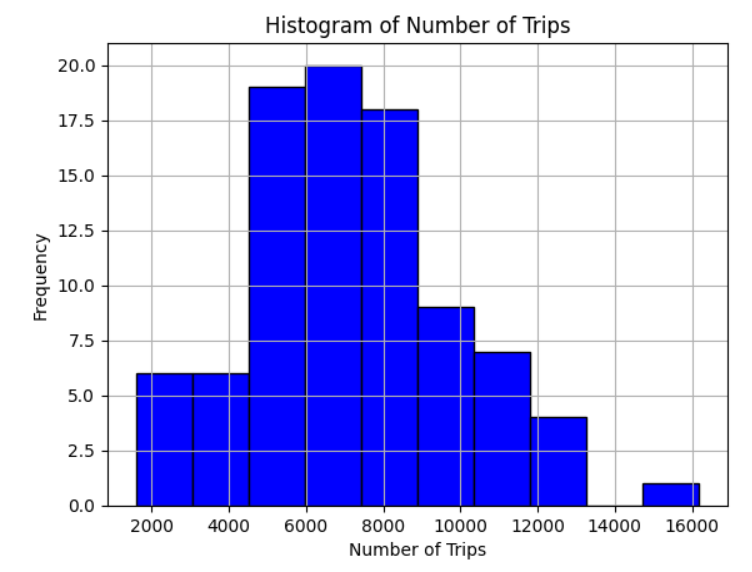

Text(0.5, 1.0, 'Histogram of Number of Trips')

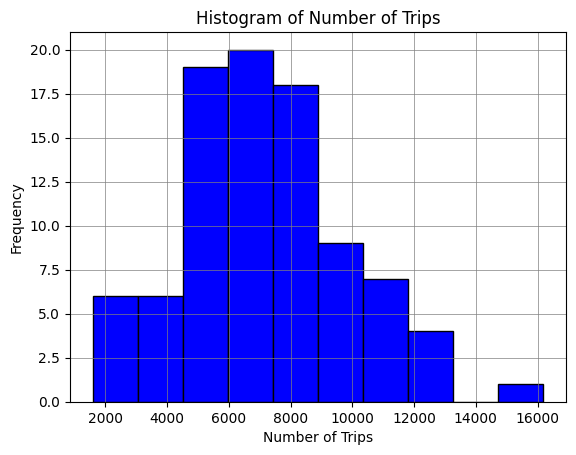

In [9]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WeatherTrips.csv')

plt.hist(df['NumTrips'], bins=10, color='blue', edgecolor='black')
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Add labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Trips')


#raise NotImplementedError()

## Q4

**Points:** 1

Plot a  histogram of precipitation (column `PRCP`).

Your plot should look like the following:

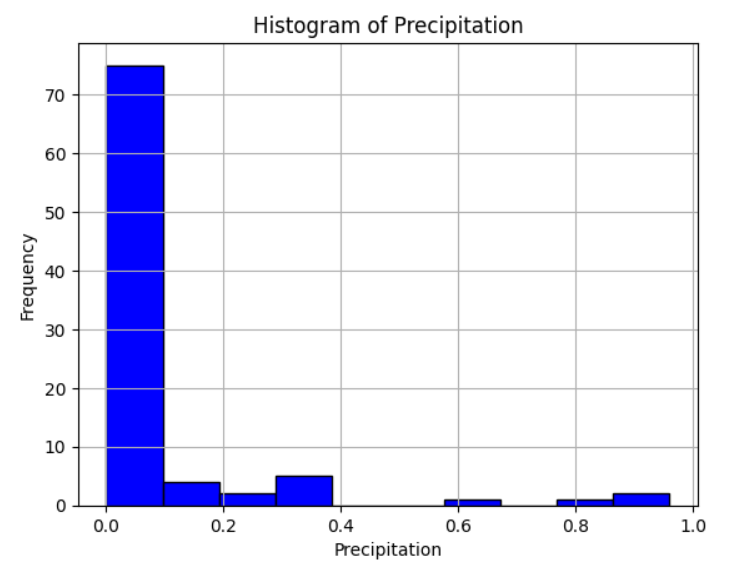

Text(0.5, 1.0, 'Histogram of Precipitation')

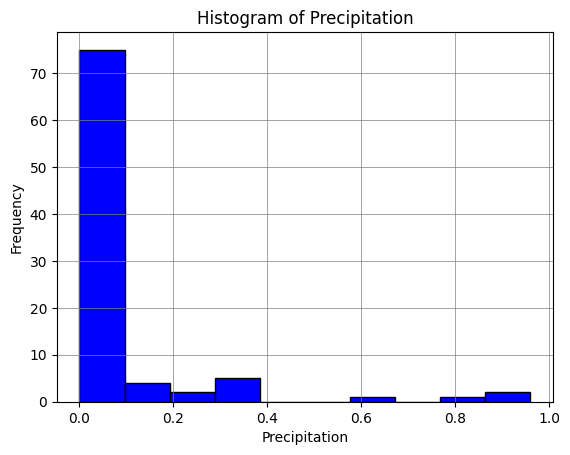

In [10]:
# YOUR CODE HERE
# Create a histogram for the "PRCP" column
plt.hist(df['PRCP'], bins=10, color='blue', edgecolor='black')
plt.grid(color='gray', linestyle='-', linewidth=0.5)


# Add labels and title
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation')
#raise NotImplementedError()

## Q5

**Points:** 1

Create a bar graph for Date (`DATE`) on the x axis and Number of Trips (column `NumTrips`) on y-axis.

Your plot should look like the following:

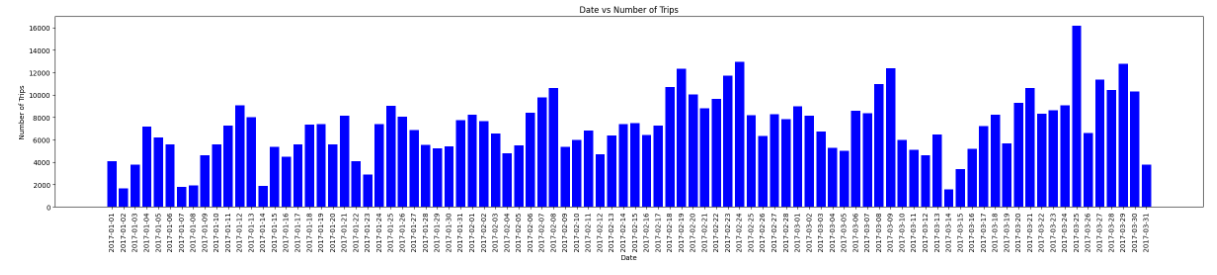

Text(0.5, 1.0, 'Date vs Number of Trips')

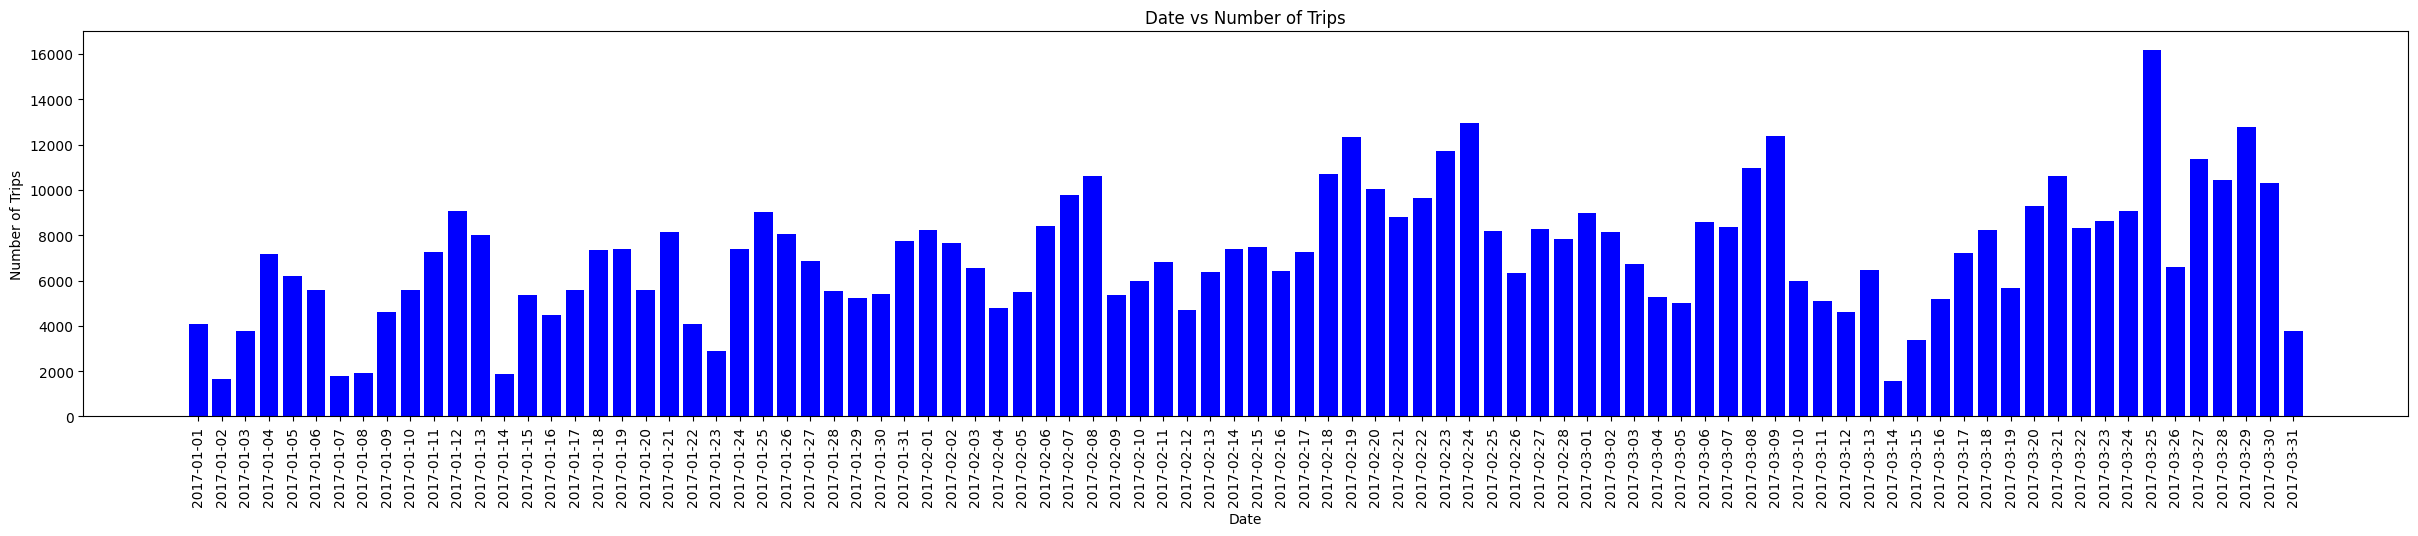

In [11]:
# DO NOT DELETE -- these options will make your chart easier to read!
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)

# YOUR CODE HERE
plt.bar(df['DATE'], df['NumTrips'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Date vs Number of Trips')
#raise NotImplementedError()

## Q6

**Points:** 1

Create a scatterplot of average temperature (column `TAVG`) vs number of trips (column `NumTrips`).

Your plot should look like the following:

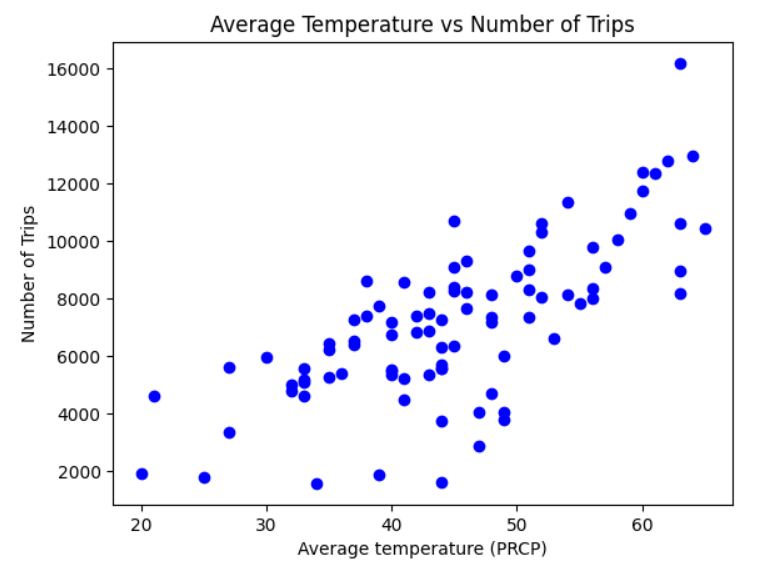

Text(0.5, 1.0, 'Average Temperature vs. Number of Trips')

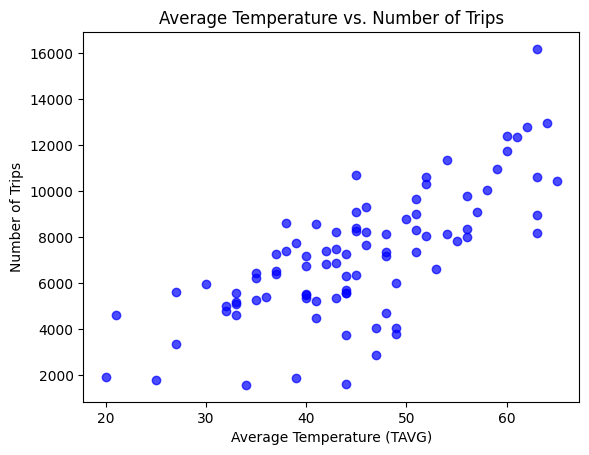

In [12]:
# YOUR CODE HERE
# Create a scatterplot
plt.scatter(df['TAVG'], df['NumTrips'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Number of Trips')
plt.title('Average Temperature vs. Number of Trips')
#raise NotImplementedError()